## Air Quality prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [3]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_excel("C:\\Users\\abc\\Desktop\\AirPollution_Vinod\\Delhi (1).xlsx", na_values = '-')

In [5]:
df.shape

(2374, 2)

In [8]:
df.head()

,date,pm25
0,2018-04-20 00:00:00,92.0
1,2018-04-19 23:00:00,89.0
2,2018-04-19 22:00:00,75.0
3,2018-04-19 21:00:00,57.0
4,2018-04-19 20:00:00,57.0


In [9]:
df.tail()

,date,pm25
2369,2018-01-01 04:00:00,470.0
2370,2018-01-01 03:00:00,466.0
2371,2018-01-01 02:00:00,417.0
2372,2018-01-01 01:00:00,414.0
2373,2018-01-01 00:00:00,423.0


In [10]:
df.describe()

,pm25
count,2294.000000
mean,193.728858
std,126.488902
min,1.000000
25%,76.000000
50%,167.000000
75%,317.000000
max,492.000000


In [11]:
df.isna().sum()

date     0
pm25    80
dtype: int64

In [12]:
##### data should be present for 4 months*24hours
#january= 31
#feburary = 28
#march = 31
#April = 20

(31+28+31+19)*24+1

2617

In [13]:
#80 PM2.5 values are missing

In [14]:
df.dtypes

date    datetime64[ns]
pm25           float64
dtype: object

In [15]:
# sorting data frame by date
df.sort_values("date", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')

In [16]:
df.head()

,date,pm25
2373,2018-01-01 00:00:00,423.0
2372,2018-01-01 01:00:00,414.0
2371,2018-01-01 02:00:00,417.0
2370,2018-01-01 03:00:00,466.0
2369,2018-01-01 04:00:00,470.0


In [17]:
df.tail()

,date,pm25
4,2018-04-19 20:00:00,57.0
3,2018-04-19 21:00:00,57.0
2,2018-04-19 22:00:00,75.0
1,2018-04-19 23:00:00,89.0
0,2018-04-20 00:00:00,92.0


In [18]:
df.dtypes

date    datetime64[ns]
pm25           float64
dtype: object

In [19]:
## creating dataframe to apply merge columns for 24 hrs of each day from 2018-01-01 00:00:00 to 2018-04-20 00:00:00

df1 = pd.DataFrame(
        {'date': pd.date_range('2018-01-01', '2018-04-21', freq='1H', closed='left')}
     )

In [20]:
df2 = df1.iloc[:2617,:]

In [21]:
df2.tail

<bound method NDFrame.tail of                     date
0    2018-01-01 00:00:00
1    2018-01-01 01:00:00
2    2018-01-01 02:00:00
3    2018-01-01 03:00:00
4    2018-01-01 04:00:00
...                  ...
2612 2018-04-19 20:00:00
2613 2018-04-19 21:00:00
2614 2018-04-19 22:00:00
2615 2018-04-19 23:00:00
2616 2018-04-20 00:00:00

[2617 rows x 1 columns]>

In [45]:
df3 = pd.merge(df,df2,on='date',how='right')
 
df3.info()

df3.sort_values("date", axis = 0, ascending = True, 
                 inplace = True)

df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 2616
Data columns (total 2 columns):
date    2617 non-null datetime64[ns]
pm25    2294 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.3 KB


,date,pm25
0,2018-01-01 00:00:00,423.0
1,2018-01-01 01:00:00,414.0
2,2018-01-01 02:00:00,417.0
3,2018-01-01 03:00:00,466.0
4,2018-01-01 04:00:00,470.0


In [46]:
#checking the count of missing values

df3.isna().sum()

date      0
pm25    323
dtype: int64

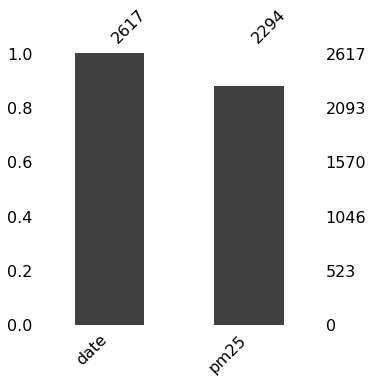

In [47]:
# Visualize missing values as a matrix 

msno.bar(df3, figsize= (5,5), color = '0.25')

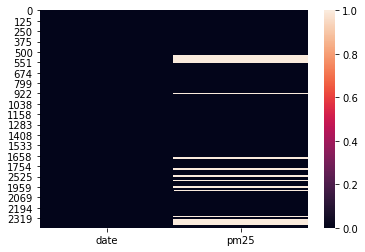

In [48]:
sns.heatmap(df3.isnull(), cbar=True)

## Data Visualization and Feature Engineering
1. We need to impute the missing data
2. Extracting days of the date, will check the trend day wise
3. will add a variable if there is holiday or not on the given day
4. then will chcek the trend for monthly trend, daily trend, hourly trend
5. we are going to use different methods for imputing methods: interpolation, Kalman, locf 


In [49]:
df3.info

<bound method DataFrame.info of                     date   pm25
0    2018-01-01 00:00:00  423.0
1    2018-01-01 01:00:00  414.0
2    2018-01-01 02:00:00  417.0
3    2018-01-01 03:00:00  466.0
4    2018-01-01 04:00:00  470.0
...                  ...    ...
2369 2018-04-19 20:00:00   57.0
2370 2018-04-19 21:00:00   57.0
2371 2018-04-19 22:00:00   75.0
2372 2018-04-19 23:00:00   89.0
2373 2018-04-20 00:00:00   92.0

[2617 rows x 2 columns]>

In [50]:
df3['Time'],df3['Date']= df3['date'].apply(lambda x:x.time()), df3['date'].apply(lambda x:x.date())

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 2373
Data columns (total 4 columns):
date    2617 non-null datetime64[ns]
pm25    2294 non-null float64
Time    2617 non-null object
Date    2617 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 102.2+ KB


In [52]:
## mean pm2.5 level for daywise
##setting index as datetime column
df3.set_index(['date'], inplace = True)
df3.head()

,pm25,Time,Date
date,,,
2018-01-01 00:00:00,423.0,00:00:00,2018-01-01
2018-01-01 01:00:00,414.0,01:00:00,2018-01-01
2018-01-01 02:00:00,417.0,02:00:00,2018-01-01
2018-01-01 03:00:00,466.0,03:00:00,2018-01-01
2018-01-01 04:00:00,470.0,04:00:00,2018-01-01


In [53]:
df3.dtypes



pm25    float64
Time     object
Date     object
dtype: object

In [54]:
backup_data = df3
df3.tail()

,pm25,Time,Date
date,,,
2018-04-19 20:00:00,57.0,20:00:00,2018-04-19
2018-04-19 21:00:00,57.0,21:00:00,2018-04-19
2018-04-19 22:00:00,75.0,22:00:00,2018-04-19
2018-04-19 23:00:00,89.0,23:00:00,2018-04-19
2018-04-20 00:00:00,92.0,00:00:00,2018-04-20


In [60]:

df3['Date'] = pd.to_datetime(df3["Date"])

## creating Days of Week field as per Date
df3['day_of_week'] = df3['Date'].dt.day_name()
df3.head()

backup_data.head()
backup_data.tail()

,pm25,Time,Date,day_of_week
date,,,,
2018-04-19 20:00:00,57.0,20:00:00,2018-04-19,Thursday
2018-04-19 21:00:00,57.0,21:00:00,2018-04-19,Thursday
2018-04-19 22:00:00,75.0,22:00:00,2018-04-19,Thursday
2018-04-19 23:00:00,89.0,23:00:00,2018-04-19,Thursday
2018-04-20 00:00:00,92.0,00:00:00,2018-04-20,Friday


In [61]:
df3 = backup_data
df3.day_of_week.value_counts()

Tuesday      384
Thursday     384
Monday       384
Wednesday    384
Friday       361
Sunday       360
Saturday     360
Name: day_of_week, dtype: int64

In [62]:
## pm2.5 values by week
weekly_pm25= df3.groupby("day_of_week").mean()
weekly_pm25.sort_values("pm25")

,pm25
day_of_week,
Sunday,175.806154
Monday,189.890449
Tuesday,191.228487
Saturday,192.116418
Thursday,195.696875
Wednesday,198.410494
Friday,215.370370


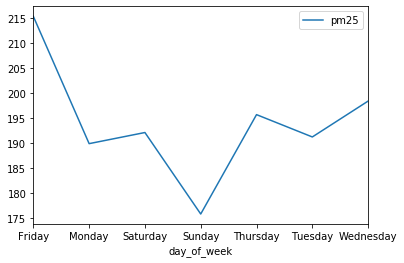

In [63]:
## plot pm2.5 level with rescpect to days
weekly_pm25.plot()

## with the graph we can see that the pm2.5 level is least on Sundays, followed by monday tuesday and Saturday

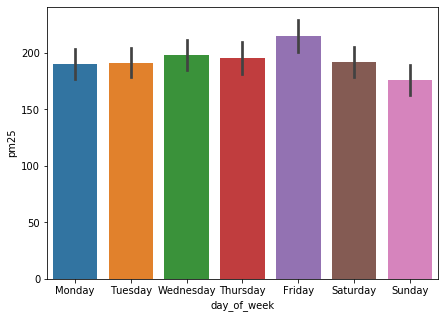

In [64]:
## Drawing box plot 
plt.figure(figsize=(7,5))
sns.barplot(x= 'day_of_week', y = 'pm25', data = df3)

## On fridays the pollution is expected to higher than other days
## However the Saturday is weekend, pm2.5 value is higher than expected due to higher value on Friday.

In [66]:
##creating month column

df3['Month'] = df3['Date'].dt.month_name()
print(df3)

                      pm25      Time       Date day_of_week    Month
date                                                                
2018-01-01 00:00:00  423.0  00:00:00 2018-01-01      Monday  January
2018-01-01 01:00:00  414.0  01:00:00 2018-01-01      Monday  January
2018-01-01 02:00:00  417.0  02:00:00 2018-01-01      Monday  January
2018-01-01 03:00:00  466.0  03:00:00 2018-01-01      Monday  January
2018-01-01 04:00:00  470.0  04:00:00 2018-01-01      Monday  January
...                    ...       ...        ...         ...      ...
2018-04-19 20:00:00   57.0  20:00:00 2018-04-19    Thursday    April
2018-04-19 21:00:00   57.0  21:00:00 2018-04-19    Thursday    April
2018-04-19 22:00:00   75.0  22:00:00 2018-04-19    Thursday    April
2018-04-19 23:00:00   89.0  23:00:00 2018-04-19    Thursday    April
2018-04-20 00:00:00   92.0  00:00:00 2018-04-20      Friday    April

[2617 rows x 5 columns]


In [67]:
## pm2.5 values by week
monthly_pm25= df3.groupby("Month").mean()
monthly_pm25.sort_values("pm25")

,pm25
Month,
April,111.230769
March,137.388979
February,194.343558
January,294.751543


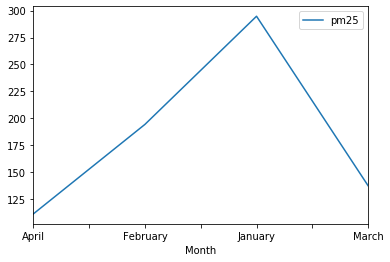

In [68]:
monthly_pm25.plot()

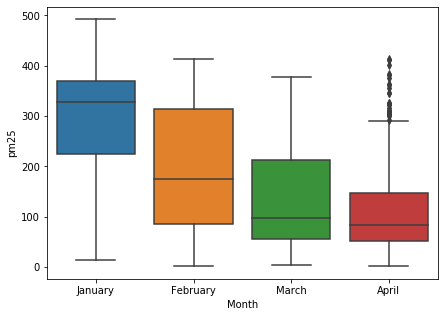

In [69]:
## Drawing box plot 
plt.figure(figsize=(7,5))
sns.boxplot(x= 'Month', y = 'pm25', data = df3)

In [ ]:
## Visualize Outlier data in month of april



###### as we can see monthly downward trend is present in the pm2.5 level, with a given set of data for 4 months
1.there are other factors which are effecting the pm2.5 level

2. With the research, it was found that crop burning in 

3.due to data access limitation, we could find the daily temperature value, and value for rest of the parameters on monthly basis


<Figure size 720x1440 with 0 Axes>

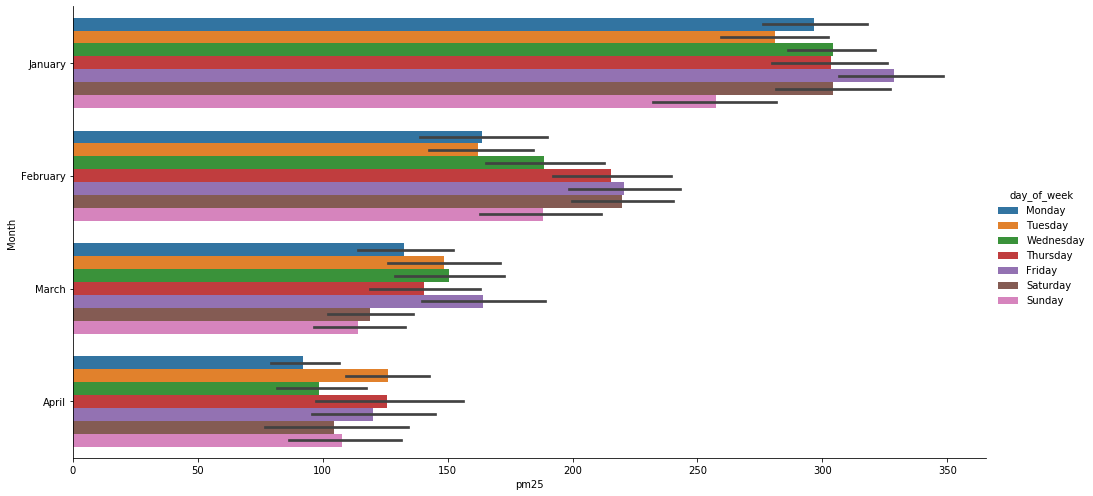

In [70]:
plt.figure(figsize=(10,20))
sns.catplot(x = "pm25",y="Month", hue="day_of_week", kind = 'bar',data=df3, height= 7, aspect=2)
plt.show()

In [71]:
## Lets explore the data on hourly basis 

hourly_pm25 = df3.groupby("Time").mean()
hourly_pm25.sort_values("pm25")


,pm25
Time,
17:00:00,92.020833
18:00:00,96.458333
16:00:00,104.968085
15:00:00,106.542553
14:00:00,110.956989
19:00:00,115.061856
13:00:00,122.234043
20:00:00,146.281250
12:00:00,146.452632


In [72]:
## to make the data more readable lets bin the time
hours = pd.to_datetime(df3['Time'], format='%H:%M:%S').dt.hour

df3['Time_bin'] = pd.cut(hours, 
                    bins=[0,2,4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], 
                    include_lowest=True, 
                    labels=['00:00 - 02:00', '02:00 - 04:00', '04:00 - 06:00', '06:00 - 08:00','08:00 - 10:00','10:00 - 12:00',
                           '12:00 - 14:00', '14:00 - 16:00', '16:00 - 18:00', '18:00 - 20:00','20:00 - 22:00','22:00 - 00:00'])

Two_hourly_pm25 = df3.groupby("Time_bin").mean()
Two_hourly_pm25.sort_values("pm25")

,pm25
Time_bin,
16:00 - 18:00,94.239583
14:00 - 16:00,105.755319
12:00 - 14:00,116.625668
18:00 - 20:00,130.590674
10:00 - 12:00,166.105263
20:00 - 22:00,196.282051
22:00 - 00:00,232.989899
08:00 - 10:00,233.075269
00:00 - 02:00,247.908475


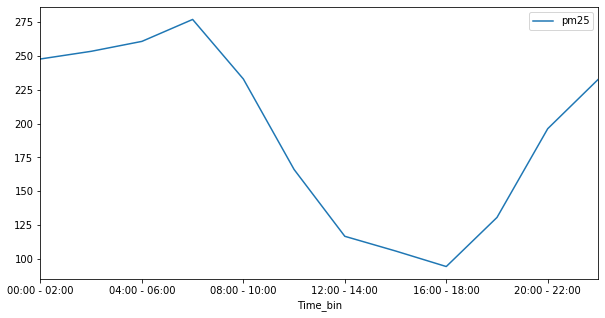

In [73]:
## plot the values to visualize the trend
Two_hourly_pm25.plot(figsize = (10,5))

## Certainly there is seasonality present in the pm2.5 level on the hourly basis

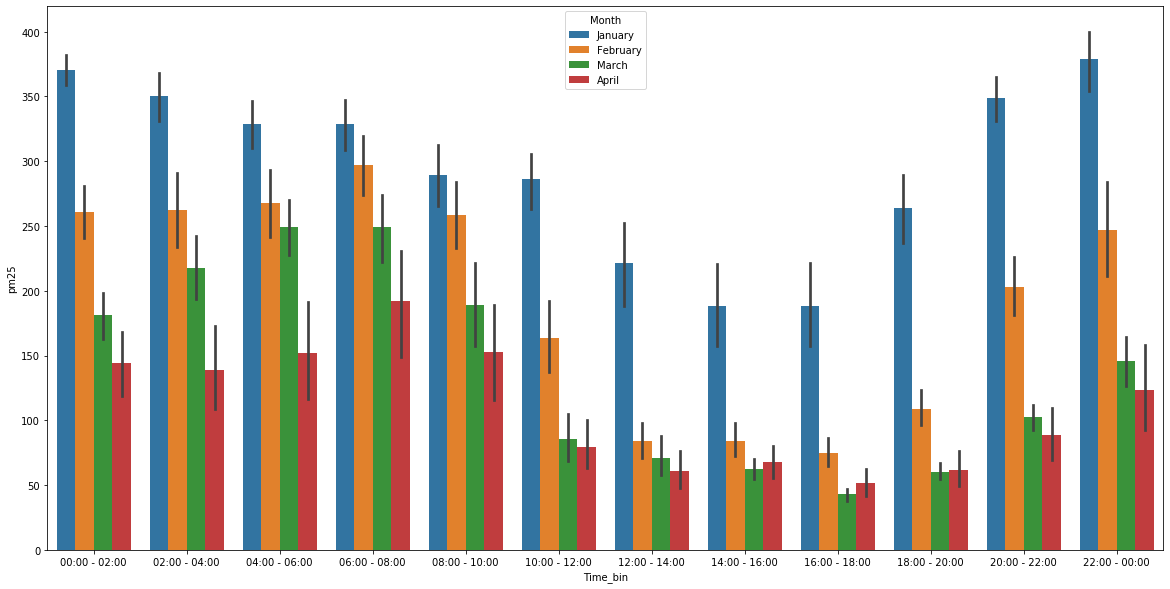

In [74]:
## Boxplot for hourly change in pm2.5 level

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x="Time_bin",y="pm25",data=df3, hue = 'Month')

#there is almost similar trend in all the months of pm2.5 value change with respect to time in Delhi Air
# there is considerable drop in pm2.5 level between 2:00pm to 8:00pm in the month of march
# there are more holidays in the month of march,  which could have impacted the lower pm2.5 level

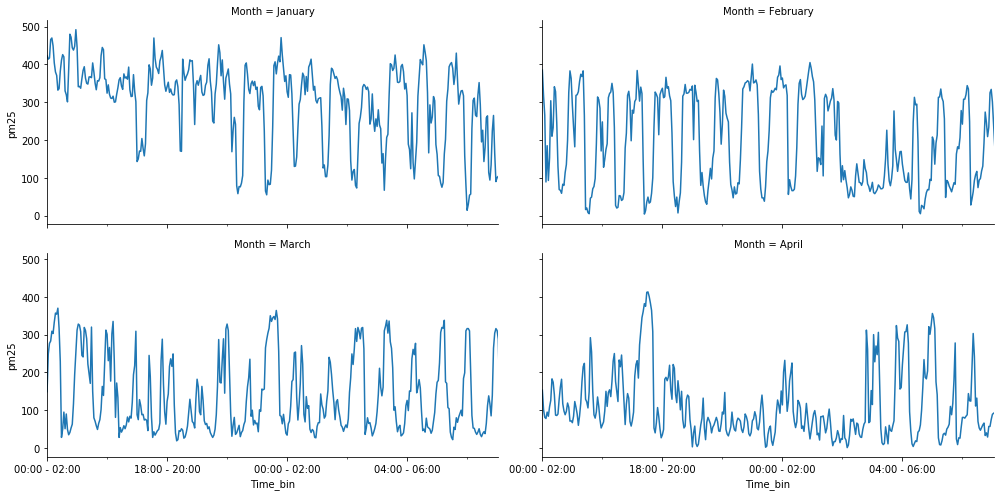

In [78]:
## Visualizing hourly change of pm2.5 for each Month

def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)


g = sns.FacetGrid(df3, col="Month", height=3.5, aspect= 2, col_wrap = 2)
g = g.map_dataframe(dateplot, "Time_bin", "pm25")

## The trend in pm2.5 level is differing with month


In [79]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2617 entries, 2018-01-01 00:00:00 to 2018-04-20 00:00:00
Data columns (total 7 columns):
pm25           2294 non-null float64
Time           2617 non-null object
Date           2617 non-null datetime64[ns]
day_of_week    2617 non-null object
Month          2617 non-null object
Time_bin       2617 non-null category
Is_Holiday     2617 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 226.1+ KB


In [80]:
df3.shape

(2617, 7)

In [81]:
df3.head

<bound method NDFrame.head of                       pm25      Time       Date day_of_week    Month  \
date                                                                   
2018-01-01 00:00:00  423.0  00:00:00 2018-01-01      Monday  January   
2018-01-01 01:00:00  414.0  01:00:00 2018-01-01      Monday  January   
2018-01-01 02:00:00  417.0  02:00:00 2018-01-01      Monday  January   
2018-01-01 03:00:00  466.0  03:00:00 2018-01-01      Monday  January   
2018-01-01 04:00:00  470.0  04:00:00 2018-01-01      Monday  January   
...                    ...       ...        ...         ...      ...   
2018-04-19 20:00:00   57.0  20:00:00 2018-04-19    Thursday    April   
2018-04-19 21:00:00   57.0  21:00:00 2018-04-19    Thursday    April   
2018-04-19 22:00:00   75.0  22:00:00 2018-04-19    Thursday    April   
2018-04-19 23:00:00   89.0  23:00:00 2018-04-19    Thursday    April   
2018-04-20 00:00:00   92.0  00:00:00 2018-04-20      Friday    April   

                          Time_bi

In [82]:

# imputing using the interpolate method=time
df3_linear = df3['pm25'].interpolate(method= 'linear')
df3_linear.isnull().sum()

0

In [83]:
bckup_data = df3
print(bckup_data)


                      pm25      Time       Date day_of_week    Month  \
date                                                                   
2018-01-01 00:00:00  423.0  00:00:00 2018-01-01      Monday  January   
2018-01-01 01:00:00  414.0  01:00:00 2018-01-01      Monday  January   
2018-01-01 02:00:00  417.0  02:00:00 2018-01-01      Monday  January   
2018-01-01 03:00:00  466.0  03:00:00 2018-01-01      Monday  January   
2018-01-01 04:00:00  470.0  04:00:00 2018-01-01      Monday  January   
...                    ...       ...        ...         ...      ...   
2018-04-19 20:00:00   57.0  20:00:00 2018-04-19    Thursday    April   
2018-04-19 21:00:00   57.0  21:00:00 2018-04-19    Thursday    April   
2018-04-19 22:00:00   75.0  22:00:00 2018-04-19    Thursday    April   
2018-04-19 23:00:00   89.0  23:00:00 2018-04-19    Thursday    April   
2018-04-20 00:00:00   92.0  00:00:00 2018-04-20      Friday    April   

                          Time_bin  Is_Holiday  
date          

In [ ]:
df3 = df3[['pm25']]
print(df3)

In [84]:


df3_FillMedian = df3.assign(FillMedian=df3.pm25.fillna(df3.pm25.median()))

# imputing using the rolling average
df3_RollingAverage = df3.assign(RollingMean=df3.pm25.fillna(df3.pm25.rolling(24,min_periods=1,).mean()))
# imputing using the rolling median
df3_RollingMedian = df3.assign(RollingMedian=df3.pm25.fillna(df3.pm25.rolling(24,min_periods=1,).median()))


#Imputing using interpolation with different methods



df3_InterpolateLinear= df3.pm25.interpolate(method='linear')
df3_InterpolateTime= df3.pm25.interpolate(method='time')
df3_InterpolateQuadratic= df3.pm25.interpolate(method='quadratic')
df3_InterpolateCubic= df3.pm25.interpolate(method='cubic')
df3_InterpolateSLinear= df3.pm25.interpolate(method='slinear')
df3_InterpolateAkima= df3.pm25.interpolate(method='akima')
df3_InterpolatePoly5= df3.pm25.interpolate(method='polynomial', order=5)
df3_InterpolatePoly7= df3.pm25.interpolate(method='polynomial', order=7)
df3_InterpolateSpline3= df3.pm25.interpolate(method='spline', order=3)
df3_InterpolateSpline4= df3.pm25.interpolate(method='spline', order=4)
df3_InterpolateSpline5= df3.pm25.interpolate(method='spline', order=5)


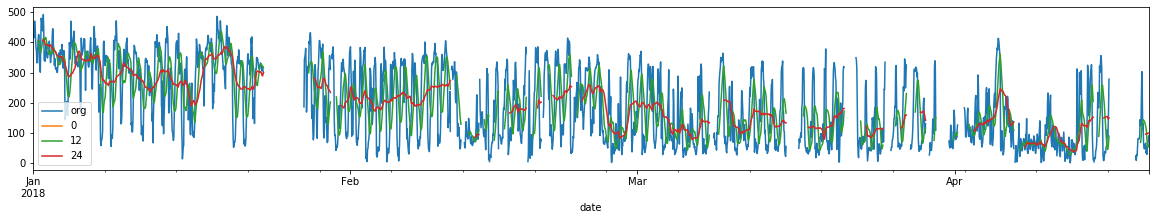

In [85]:
# moving average for the time series to understand better about the trend

plt.figure(figsize=(20,3))

df3.pm25.plot(label="org")
for i in range(0,25,12):
    df3["pm25"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

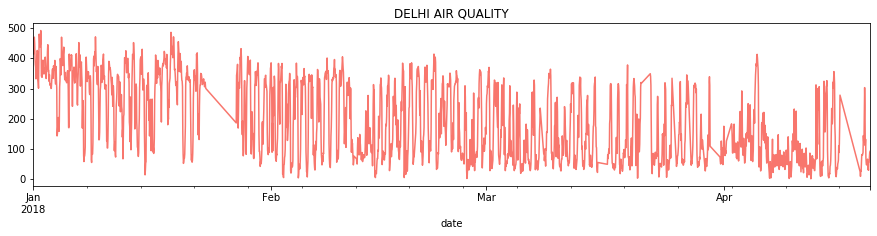

In [88]:
df3_InterpolateLinear.plot(figsize=(15,3), color="#F8766D", title='DELHI AIR QUALITY')
plt.show()

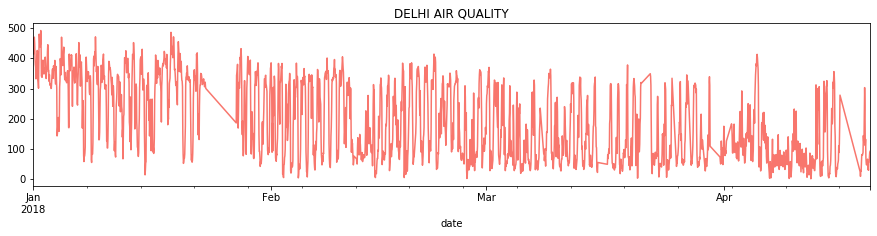

In [89]:
df3_InterpolateSLinear.plot(figsize=(15,3), color="#F8766D", title='DELHI AIR QUALITY')
plt.show()

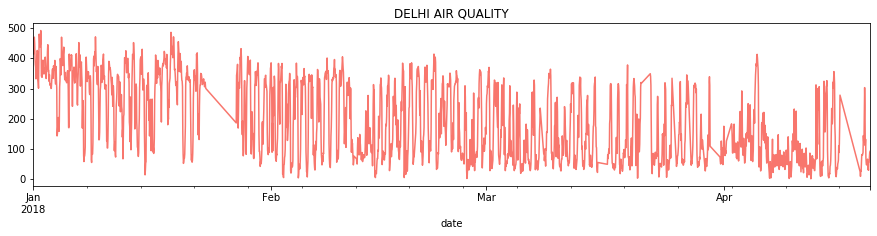

In [90]:
df3_InterpolateTime.plot(figsize=(15,3), color="#F8766D", title='DELHI AIR QUALITY')
plt.show()

Text(0.5, 1.0, 'rolling mean & standard deviation')

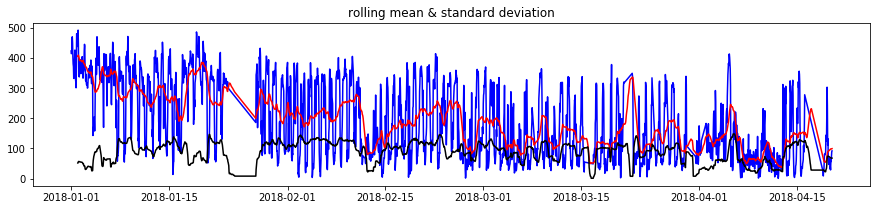

In [91]:
    rolmean = pd.Series(df3_InterpolateTime).rolling(window = 24).mean()
    rolstd = pd.Series(df3_InterpolateTime).rolling(window = 24).std()

##plot rolling statistics
plt.figure(figsize=(15,3)) 
orig=plt.plot(df3_InterpolateTime,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.title('rolling mean & standard deviation')

##It can be observed from rolling mean and rolling std deviation is not constant, Hence we will check the ADFuller test

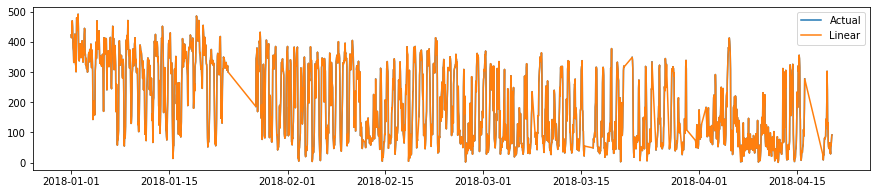

In [92]:
plt.figure(figsize=(15,3))

plt.plot(df3['pm25'], label='Actual')
plt.plot(df3_InterpolateLinear, label='Linear')


plt.legend()
plt.show()

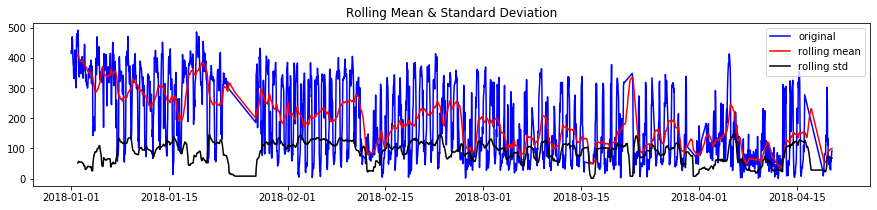

Results of Dickey-Fuller Test:
Test Statistic                   -4.057066
p-value                           0.001139
#Lags Used                       27.000000
Number of Observations Used    2589.000000
Critical Value (1%)              -3.432878
Critical Value (5%)              -2.862657
Critical Value (10%)             -2.567365
dtype: float64


In [93]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df3_InterpolateLinear):
    
    #Determing rolling statistics
    rolmean = pd.Series(df3_InterpolateLinear).rolling(window = 24).mean()
    rolstd = pd.Series(df3_InterpolateLinear).rolling(window = 24).std()
    
    #plot rolling statistics
    plt.figure(figsize=(15,3)) 
    orig=plt.plot(df3_InterpolateLinear,color='blue',label='original')
    mean=plt.plot(rolmean,color='red',label='rolling mean')
    std=plt.plot(rolstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df3_InterpolateLinear, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


test_stationarity(df3_InterpolateLinear)
## As the p-value is too low and T-statistic value is also lower than the critical values
## the ADF test has an alternate hypothesis of linear or difference stationary
## As per rolling stats we can see that data is not showing contant mean and std deviation

In [94]:
df3 = bckup_data[['pm25','Time', 'Month', 'day_of_week']]
df3.head

<bound method NDFrame.head of                       pm25      Time    Month day_of_week
date                                                     
2018-01-01 00:00:00  423.0  00:00:00  January      Monday
2018-01-01 01:00:00  414.0  01:00:00  January      Monday
2018-01-01 02:00:00  417.0  02:00:00  January      Monday
2018-01-01 03:00:00  466.0  03:00:00  January      Monday
2018-01-01 04:00:00  470.0  04:00:00  January      Monday
...                    ...       ...      ...         ...
2018-04-19 20:00:00   57.0  20:00:00    April    Thursday
2018-04-19 21:00:00   57.0  21:00:00    April    Thursday
2018-04-19 22:00:00   75.0  22:00:00    April    Thursday
2018-04-19 23:00:00   89.0  23:00:00    April    Thursday
2018-04-20 00:00:00   92.0  00:00:00    April      Friday

[2617 rows x 4 columns]>

In [95]:
## assigning pm25 as the Linear interpolation values
df3['pm25'] = df3_InterpolateLinear
#df3.reset_index(inplace = True)
df3.head()

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pm25,Time,Month,day_of_week
date,,,,
2018-01-01 00:00:00,423.0,00:00:00,January,Monday
2018-01-01 01:00:00,414.0,01:00:00,January,Monday
2018-01-01 02:00:00,417.0,02:00:00,January,Monday
2018-01-01 03:00:00,466.0,03:00:00,January,Monday
2018-01-01 04:00:00,470.0,04:00:00,January,Monday


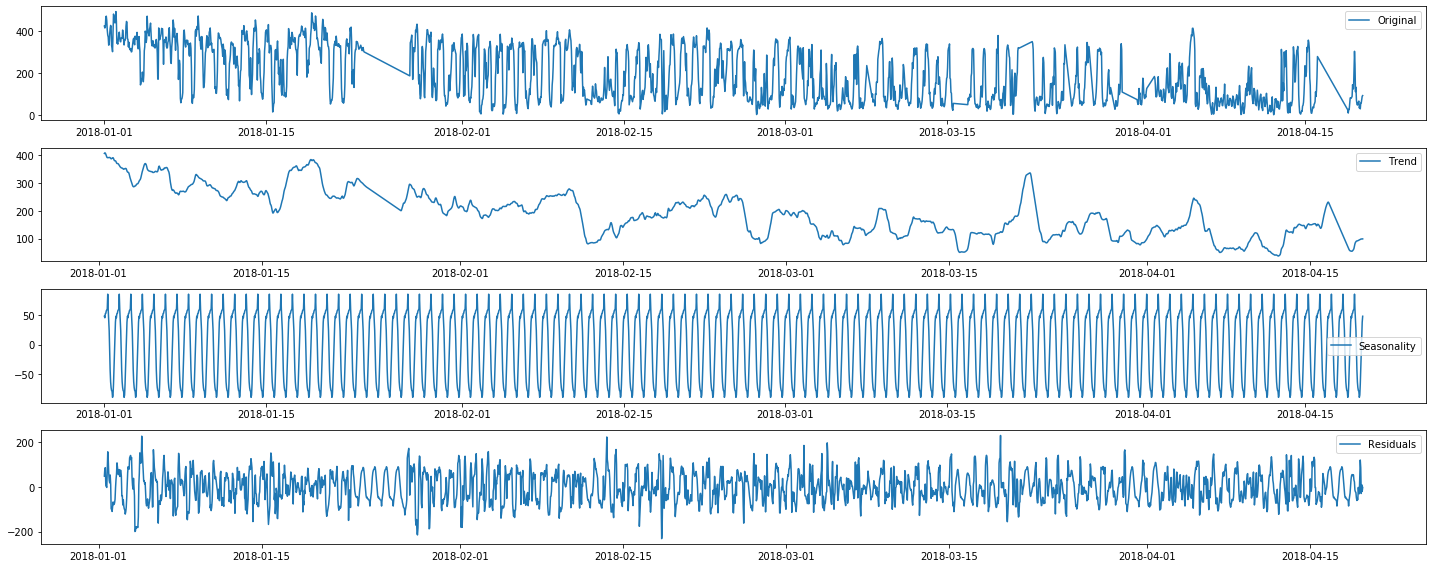

In [100]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df3_InterpolateLinear)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))
plt.subplot(411)
plt.plot(df3_InterpolateLinear, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [103]:
## Normalizing pm2.5 values to 0-1 scale, as pre-requisite for LSTM
## Diving data in train, test and testFinal, train and test will be part of model creation in LSTM.
## Final testing will be done on testFinal dataset, which will be unseen for training model.

from sklearn.preprocessing import MinMaxScaler
dataset = df3.pm25[:2092].values #numpy.ndarray

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = np.reshape(dataset, (-1, 1))

dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

## final testing dataset
test_final = df3.pm25[2092:].values

test_final = np.reshape(test_final, (-1, 1))
test_final = scaler.fit_transform(test_final)

In [104]:
## validating if all values in all the 3 datasets are in 0-1 range
train, test, test_final

(array([[0.85918367],
        [0.84081633],
        [0.84693878],
        ...,
        [0.16326531],
        [0.11836735],
        [0.10816327]]), array([[0.08571429],
        [0.10612245],
        [0.12040816],
        [0.10612245],
        [0.15306122],
        [0.29591837],
        [0.3755102 ],
        [0.50408163],
        [0.44693878],
        [0.53061224],
        [0.64081633],
        [0.57142857],
        [0.64693878],
        [0.62653061],
        [0.58571429],
        [0.64285714],
        [0.64693878],
        [0.53061224],
        [0.06938776],
        [0.10408163],
        [0.15918367],
        [0.12857143],
        [0.13265306],
        [0.10408163],
        [0.06122449],
        [0.07755102],
        [0.1       ],
        [0.12857143],
        [0.19183673],
        [0.28367347],
        [0.42653061],
        [0.3244898 ],
        [0.27755102],
        [0.3244898 ],
        [0.62857143],
        [0.65306122],
        [0.68571429],
        [0.61632653],
        [0.6816326

In [105]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)


In [106]:

# reshape into X=t and Y=t+1
look_back = 24
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)
X_testFinal, Y_testFinal = create_dataset(test_final, look_back)


In [107]:
X_train.shape

(1648, 24)

In [108]:
Y_test.shape

(394,)

In [109]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_testFinal = X_testFinal.reshape(X_testFinal.shape[0],X_testFinal.shape[1] , 1)

X_train.shape, X_testFinal.shape, X_test.shape


((1648, 24, 1), (500, 24, 1), (394, 24, 1))

In [110]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

C:\Users\abc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type

In [111]:
## training the model
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(24,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dense(1))
#model.add(Dropout(0.8))
model.compile(loss='mean_squared_error',optimizer='adam')

history = model.fit(X_train, Y_train, epochs=500, batch_size=40, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1648 samples, validate on 394 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
1648/1648 [==============================] - 14s 9ms/sample - loss: 0.0857 - val_loss: 0.0436
Epoch 2/500
1648/1648 [==============================] - 8s 5ms/sample - loss: 0.0501 - val_loss: 0.0389
Epoch 3/500
1648/1648 [==============================] - 8s 5ms/sample - loss: 0.0450 - val_loss: 0.0396
Epoch 4/500
1648/1648 [==============================] - 8s 5ms/sample - loss: 0.0441 - val_loss: 0.0359
Epoch 5/500
1648/1648 [==============================] - 8s 5ms/sample - loss: 0.0411 - val_loss: 0.0239
Epoch 6/500
1648/1648 [==============================] - 8s 5ms/sample - loss: 0.0312 - val_loss: 0.0233
Epoch 7/500
1648/1648 [==============================] - 8s 5ms/sample - loss: 0.0284 - val_loss: 0.0226
Epoch 8/500
1648/1648 [==========================

In [112]:
# Training Phase
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 100)           80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [113]:
from scipy import stats
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
testFinal_predict = model.predict(X_testFinal)

In [114]:
## validating format of predicted train, test and testFinal values
train_predict, test_predict, testFinal_predict


(array([[0.83685535],
        [0.93698144],
        [0.77635473],
        ...,
        [0.19801438],
        [0.15147358],
        [0.13865075]], dtype=float32), array([[0.10478453],
        [0.0769577 ],
        [0.10716332],
        [0.13882345],
        [0.18377152],
        [0.25730202],
        [0.3426715 ],
        [0.467632  ],
        [0.33256465],
        [0.3113825 ],
        [0.35191336],
        [0.6184297 ],
        [0.59159225],
        [0.6222948 ],
        [0.5527627 ],
        [0.62867105],
        [0.4699232 ],
        [0.43346226],
        [0.294071  ],
        [0.14507066],
        [0.20471561],
        [0.12047895],
        [0.09632494],
        [0.12068569],
        [0.12213669],
        [0.07276613],
        [0.09566899],
        [0.11236161],
        [0.1743924 ],
        [0.27320567],
        [0.29162514],
        [0.23748758],
        [0.34928343],
        [0.3347246 ],
        [0.4879196 ],
        [0.50524336],
        [0.4697202 ],
        [0.5300991 ],
   

In [115]:
Y_testFinal, Y_test, Y_train

(array([0.26213592, 0.25931726, 0.25649859, 0.25367992, 0.25086126,
        0.24804259, 0.24522393, 0.24240526, 0.2395866 , 0.23676793,
        0.23394926, 0.2311306 , 0.22831193, 0.22549327, 0.2226746 ,
        0.21985593, 0.21703727, 0.2142186 , 0.21139994, 0.20858127,
        0.20576261, 0.20294394, 0.20012527, 0.19730661, 0.19448794,
        0.19166928, 0.18885061, 0.18603194, 0.18321328, 0.18039461,
        0.17757595, 0.17475728, 0.13834951, 0.11893204, 0.15776699,
        0.30339806, 0.23058252, 0.25      , 0.12378641, 0.15776699,
        0.11407767, 0.14563107, 0.27184466, 0.4223301 , 0.36893204,
        0.24271845, 0.19417476, 0.1868932 , 0.22815534, 0.20145631,
        0.26213592, 0.30339806, 0.3120449 , 0.32069175, 0.32933859,
        0.33798544, 0.34663228, 0.35527913, 0.36392597, 0.37257282,
        0.38121966, 0.3898665 , 0.39851335, 0.40716019, 0.41580704,
        0.42445388, 0.43310073, 0.44174757, 0.41990291, 0.33980583,
        0.20873786, 0.20631068, 0.21601942, 0.31

In [116]:
# Transform the train and test set in its original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
testFinal = scaler.inverse_transform(testFinal_predict)

In [117]:
## Now check the train and test predicted values
test_predict, train_predict,testFinal

(array([[ 44.171223],
        [ 32.70657 ],
        [ 45.15129 ],
        [ 58.195263],
        [ 76.71387 ],
        [107.00843 ],
        [142.18066 ],
        [193.66438 ],
        [138.01663 ],
        [129.2896  ],
        [145.98831 ],
        [255.79303 ],
        [244.736   ],
        [257.38544 ],
        [228.73822 ],
        [260.01245 ],
        [194.60835 ],
        [179.58646 ],
        [122.15725 ],
        [ 60.76911 ],
        [ 85.342834],
        [ 50.637325],
        [ 40.685875],
        [ 50.722504],
        [ 51.320316],
        [ 30.979643],
        [ 40.415627],
        [ 47.292984],
        [ 72.84967 ],
        [113.56074 ],
        [121.14956 ],
        [ 98.84489 ],
        [144.90477 ],
        [138.90654 ],
        [202.02287 ],
        [209.16025 ],
        [194.52473 ],
        [219.40082 ],
        [125.15403 ],
        [146.9888  ],
        [148.91605 ],
        [117.055435],
        [ 67.63485 ],
        [ 41.956455],
        [ 46.719593],
        [ 

In [118]:
## Apply reverse transformations on Y_train and Y_test and check the values
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])
Y_testFinal = scaler.inverse_transform([Y_testFinal])
Y_train, Y_test, Y_testFinal

(array([[413.        , 374.32244898, 286.03673469, ...,  83.4       ,
          68.26530612,  49.76734694]]),
 array([[ 26.2244898 ,  32.95102041,  42.2       ,  53.97142857,
          80.03673469, 117.87346939, 176.73061224, 134.68979592,
         115.35102041, 134.68979592, 259.97142857, 270.06122449,
         283.51428571, 254.92653061, 281.83265306, 235.5877551 ,
         221.29387755, 177.57142857,  83.4       ,  90.96734694,
          58.1755102 ,  35.47346939,  45.56326531,  49.76734694,
          26.2244898 ,  28.74693878,  32.95102041,  53.97142857,
          93.48979592, 105.26122449,  82.55918367, 126.28163265,
         125.44081633, 197.75102041, 218.77142857, 207.        ,
         232.2244898 , 122.07755102, 133.00816327, 151.50612245,
         133.00816327,  80.87755102,  37.99591837,  41.35918367,
          34.63265306,  65.74285714,  46.40408163,  43.88163265,
          41.35918367,  32.11020408,  38.83673469,  59.01632653,
          78.35510204, 119.55510204, 145.6204

In [119]:
## Compairing the values of Y_testFinal and testFinal predicted values
Y_testFinal, testFinal[:,0]

(array([[109.        , 107.83870968, 106.67741935, 105.51612903,
         104.35483871, 103.19354839, 102.03225806, 100.87096774,
          99.70967742,  98.5483871 ,  97.38709677,  96.22580645,
          95.06451613,  93.90322581,  92.74193548,  91.58064516,
          90.41935484,  89.25806452,  88.09677419,  86.93548387,
          85.77419355,  84.61290323,  83.4516129 ,  82.29032258,
          81.12903226,  79.96774194,  78.80645161,  77.64516129,
          76.48387097,  75.32258065,  74.16129032,  73.        ,
          58.        ,  50.        ,  66.        , 126.        ,
          96.        , 104.        ,  52.        ,  66.        ,
          48.        ,  61.        , 113.        , 175.        ,
         153.        , 101.        ,  81.        ,  78.        ,
          95.        ,  84.        , 109.        , 126.        ,
         129.5625    , 133.125     , 136.6875    , 140.25      ,
         143.8125    , 147.375     , 150.9375    , 154.5       ,
         158.0625    , 16

###### Visualizing the errors, loss values and graphs for actual and predicted values
#### ets check the error in train, test and testFinal sets


In [120]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Validation Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Validation Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_testFinal[0], testFinal[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_testFinal[0], testFinal[:,0])))


Train Mean Absolute Error: 29.997052723820328
Train Root Mean Squared Error: 41.03496850377444
Validation Mean Absolute Error: 27.156552427563454
Validation Root Mean Squared Error: 38.502084296632134
Test Mean Absolute Error: 28.736769642399203
Test Root Mean Squared Error: 40.70670881133214


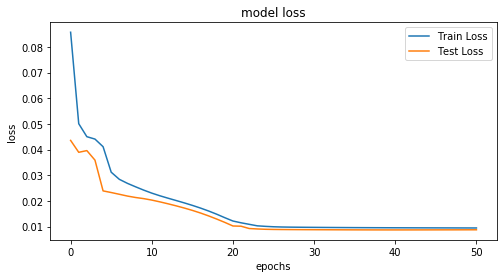

In [121]:
## Lets plot the Loss Function for train and test set
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

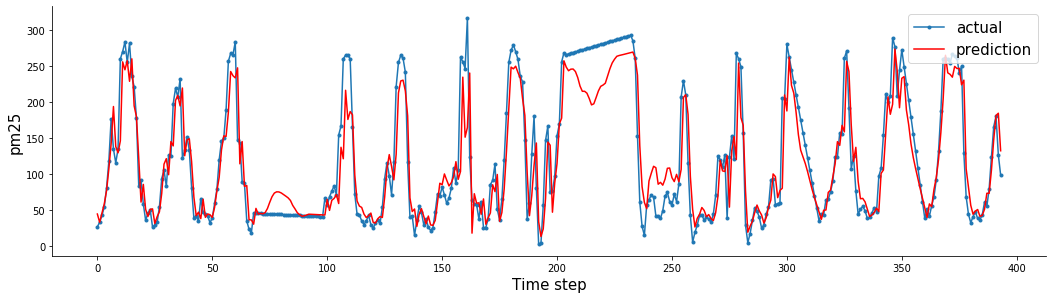

In [122]:
## Lets plot 394 observations of test set

aa=[x for x in range(394)]
plt.figure(figsize=(15,4))
plt.plot(aa, Y_test[0][:394], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:394], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('pm25', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();


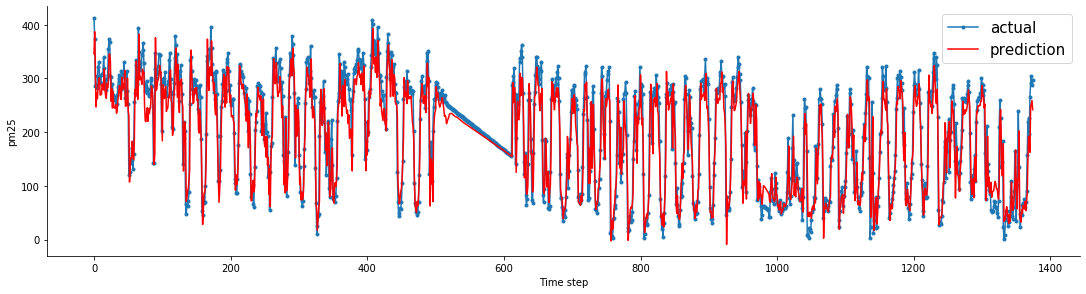

In [123]:
## Let's plot train set for Actual and predicted values

aa=[x for x in range(1375)]
plt.figure(figsize=(15,4))
plt.plot(aa, Y_train[0][:1375], marker='.', label="actual")
plt.plot(aa, train_predict[:,0][:1375], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
#plt.subplots_adjust(left=0.07)
plt.ylabel('pm25')
plt.xlabel('Time step')
plt.legend(fontsize=15)
plt.show();


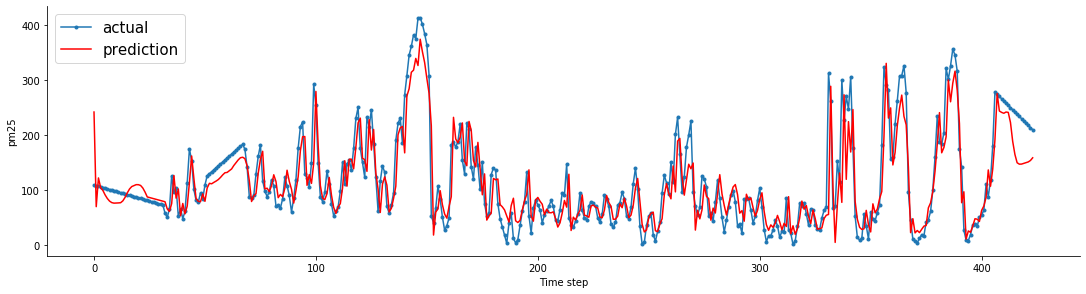

In [124]:
## Compairing the values of Y_test and test predicted values

pd.DataFrame(Y_test[0], test_predict[:,0])

## Lets compare testFinal actual and prediction values

pd.DataFrame(Y_testFinal[0], testFinal[:,0])

## Lets plot to visualize the actual and predicted values of testFinal
aa=[x for x in range(424)]
plt.figure(figsize=(15,4))
plt.plot(aa, Y_testFinal[0][:424], marker='.', label="actual")
plt.plot(aa, testFinal[:,0][:424], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
#plt.subplots_adjust(left=0.07)
plt.ylabel('pm25')
plt.xlabel('Time step')
plt.legend(fontsize=15)
plt.show();



#### As the model is build on Linear interpolation values which were imputed for 326 missing PM2.5 values. 

The Accuracy is effected, also if we can get the other variables which impact PM2.5 values in the air, we can come up with better accuracy

Slight Hyper-parameters optimization can be done reduce the error
